In [31]:

# 1. IMPORT LIBRARIES
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import os, gzip, struct, pandas as pd

# Make output a bit nicer
plt.rcParams["figure.figsize"] = (10, 7)
sns.set(style="whitegrid")

# 2. LOAD THE DATA

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [32]:

# 3. PRE-PROCESSING

# Scale pixels to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add a channel dimension so images are (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

# Class names for plots
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [33]:

# 4. BUILD THE MODEL  (simple CNN)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:

# 5. TRAIN THE MODEL

EPOCHS = 10
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
844/844 - 46s - 54ms/step - accuracy: 0.8169 - loss: 0.5096 - val_accuracy: 0.8692 - val_loss: 0.3671
Epoch 2/10
844/844 - 79s - 94ms/step - accuracy: 0.8781 - loss: 0.3368 - val_accuracy: 0.8840 - val_loss: 0.3225
Epoch 3/10
844/844 - 41s - 49ms/step - accuracy: 0.8950 - loss: 0.2866 - val_accuracy: 0.8955 - val_loss: 0.2905
Epoch 4/10
844/844 - 82s - 98ms/step - accuracy: 0.9069 - loss: 0.2550 - val_accuracy: 0.9060 - val_loss: 0.2619
Epoch 5/10
844/844 - 82s - 97ms/step - accuracy: 0.9156 - loss: 0.2287 - val_accuracy: 0.9115 - val_loss: 0.2497
Epoch 6/10
844/844 - 82s - 97ms/step - accuracy: 0.9248 - loss: 0.2061 - val_accuracy: 0.9120 - val_loss: 0.2386
Epoch 7/10
844/844 - 82s - 97ms/step - accuracy: 0.9303 - loss: 0.1890 - val_accuracy: 0.9110 - val_loss: 0.2385
Epoch 8/10
844/844 - 82s - 97ms/step - accuracy: 0.9378 - loss: 0.1700 - val_accuracy: 0.9197 - val_loss: 0.2297
Epoch 9/10
844/844 - 81s - 97ms/step - accuracy: 0.9434 - loss: 0.1546 - val_accuracy: 0.9020 - 

In [35]:
# 6. EVALUATE ON TEST SET
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n📊  Test accuracy: {test_acc:.4f}")


📊  Test accuracy: 0.9026


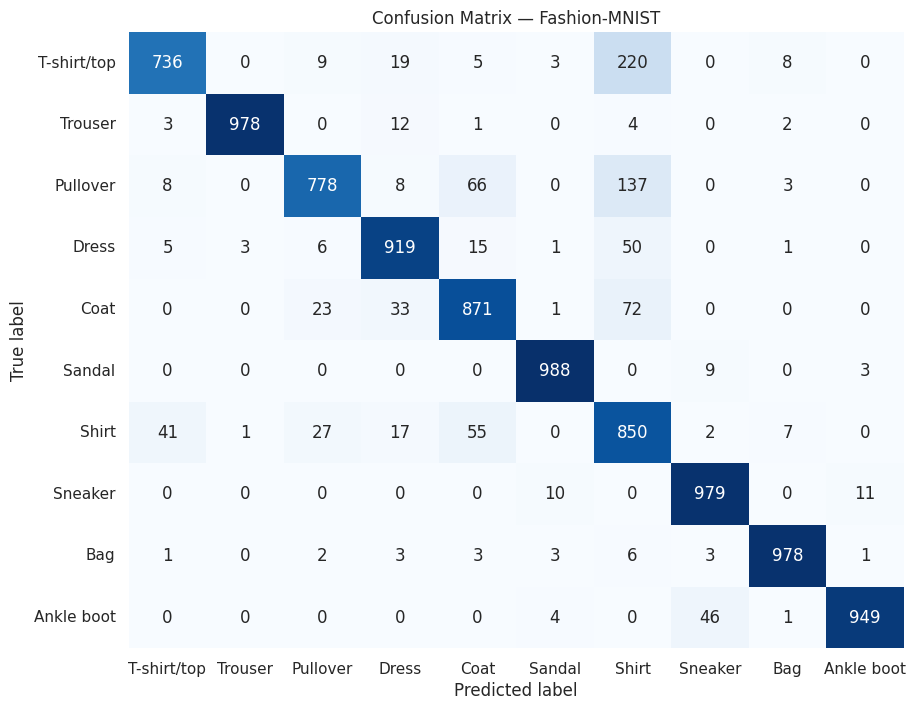

In [36]:

# 7. CONFUSION MATRIX
# Get predicted labels
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix — Fashion-MNIST")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [37]:

# 8. PRINT DETAILED METRICS

print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))



Detailed classification report:

              precision    recall  f1-score   support

 T-shirt/top       0.93      0.74      0.82      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.92      0.78      0.84      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.86      0.87      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.63      0.85      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

